## Import all needed libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




## Read Data Set & remove whitespaces from columns names

In [2]:
data = pd.read_csv(r'C:\Users\moham\Downloads\first inten project.csv')
data.columns = data.columns.str.strip()

data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [3]:
data.tail(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36275,INN36276,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,10/2/2017,Not_Canceled
36276,INN36277,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
36277,INN36278,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,2/28/2018,Canceled
36278,INN36279,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,5/20/2018,Canceled
36279,INN36281,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,4/11/2018,Canceled
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


## Features Information

**Booking Information:**

**Booking_ID**: A unique identifier for each booking.  
**Number of adults**: No. of adults in a single booking record.  
**Number of children**: No. of children in a single booking record.  
**Number of weekend nights**: No. of weekend nights spent in a hotel.  
**Number of week nights**: No. of weeknights spent in a hotel.  
**Type of meal**: Type of meal chosen.  
**Car parking space**: Indicates whether a car parking space was requested or included (No. of car parking asked in booking).  
**Room type**: The type of room booked (e.g., standard, deluxe, suite).  
**Lead time**: The time difference between the reservation date and the check-in date.  

**Customer and Market Information:**

**Market segment type**: The type of market segment the customer belongs to (e.g., online, offline).  
**Repeated**: Indicates whether the customer is a repeat customer.  
**P-C**: previous_cancellations > No. of previous canceled bookings.  
**P-not-C**: previous_bookings_not_canceled > No. of previous non-canceled bookings.  

**Pricing and Special Requests:**

**Average price**: The average price per night for the booking.  
**Special requests**: Any special requests for the booking.  

**Booking Status:**

**Date of reservation**: The date the booking was made.  
**Booking status**: The current status of the booking (e.g., confirmed, canceled, no-show).  


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Checking for missing values or NULLS

In [6]:
data.isnull().sum()


Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [7]:
data['date of reservation'].head()


0    10/2/2015
1    11/6/2018
2    2/28/2018
3    5/20/2017
4    4/11/2018
Name: date of reservation, dtype: object

## drop unnecessary feature


In [8]:
data = data.drop('Booking_ID', axis=1)


## convert 'date of reservation' to datetime values


In [9]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
# remove invalid dates
data.dropna(subset=['date of reservation'], inplace=True)


In [10]:
data.isnull().sum()


number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [11]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled


## split 'date of reservation' to year, month & day features


In [12]:
data['year'] = data['date of reservation'].dt.year
data['month'] = data['date of reservation'].dt.month
data['day'] = data['date of reservation'].dt.day
data = data.drop('date of reservation', axis=1)
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


## convert object values to numeric values


In [13]:
label_encoder = LabelEncoder()
data['type of meal'] = label_encoder.fit_transform(data['type of meal'])
data['room type'] = label_encoder.fit_transform(data['room type'])
data['market segment type'] = label_encoder.fit_transform(data['market segment type'])
data['booking status'] = label_encoder.fit_transform(data['booking status'])
data.head()


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,1,2015,10,2
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,1,2018,11,6
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,0,2018,2,28
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,0,2017,5,20
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,0,2018,4,11


In [14]:
# Summary statistics
print("Statistics:\n", data.describe())
data.info()


Statistics:
        number of adults  number of children  number of weekend nights  \
count      36248.000000        36248.000000              36248.000000   
mean           1.845178            0.105302                  0.810445   
std            0.518671            0.402597                  0.870938   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  type of meal  car parking space     room type  \
count           36248.000000  36248.000000       36248.000000  36248.000000   
mean                2.204508      0.516056           0.030926      0.708425   
std                 1.410825      1.048506           0.173119      1.399401   
min          

## plotting the box plot to check the outliers

In [15]:
def plot_outliers(data):
  
    # Select only numerical columns
    numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns
    
    # Set the size of the plot
    plt.figure(figsize=(15, 8))
    
    # Create a box plot for each numerical column
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Adjust the layout
        sns.boxplot(data=data[col],palette='rainbow',orient='h')
        plt.title(f'Box Plot of {col}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: Future

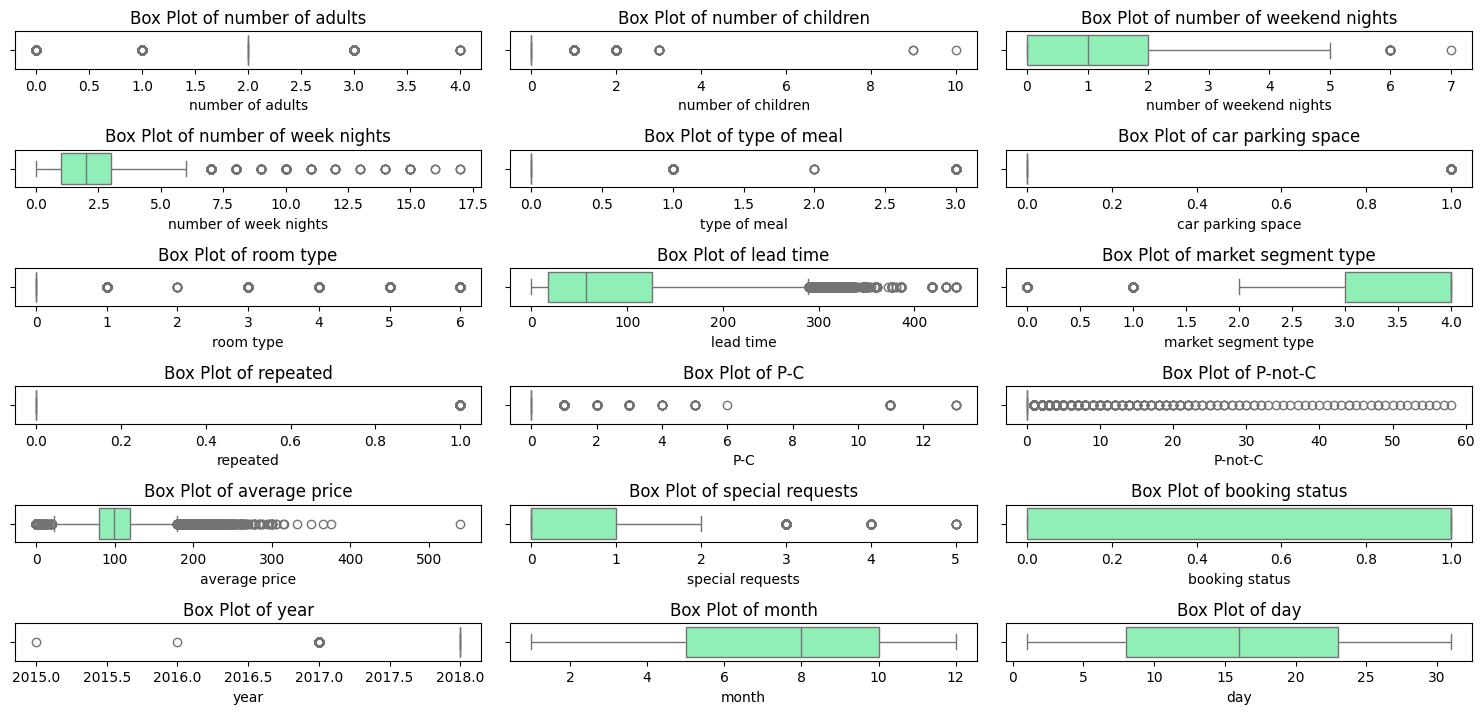

In [16]:
 plot_outliers(data)

## Removing Outliers

In [17]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [18]:
columns = ['number of adults', 'number of children', 'number of weekend nights', 
           'number of week nights', 'car parking space', 'lead time', 'repeated', 
           'P-C', 'P-not-C', 'special requests', 'average price']

for column in columns:
    data = remove_outliers_iqr(data, column)

## After removing outliers

C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\moham\AppData\Local\Temp\ipykernel_3324\3745747988.py:12: Future

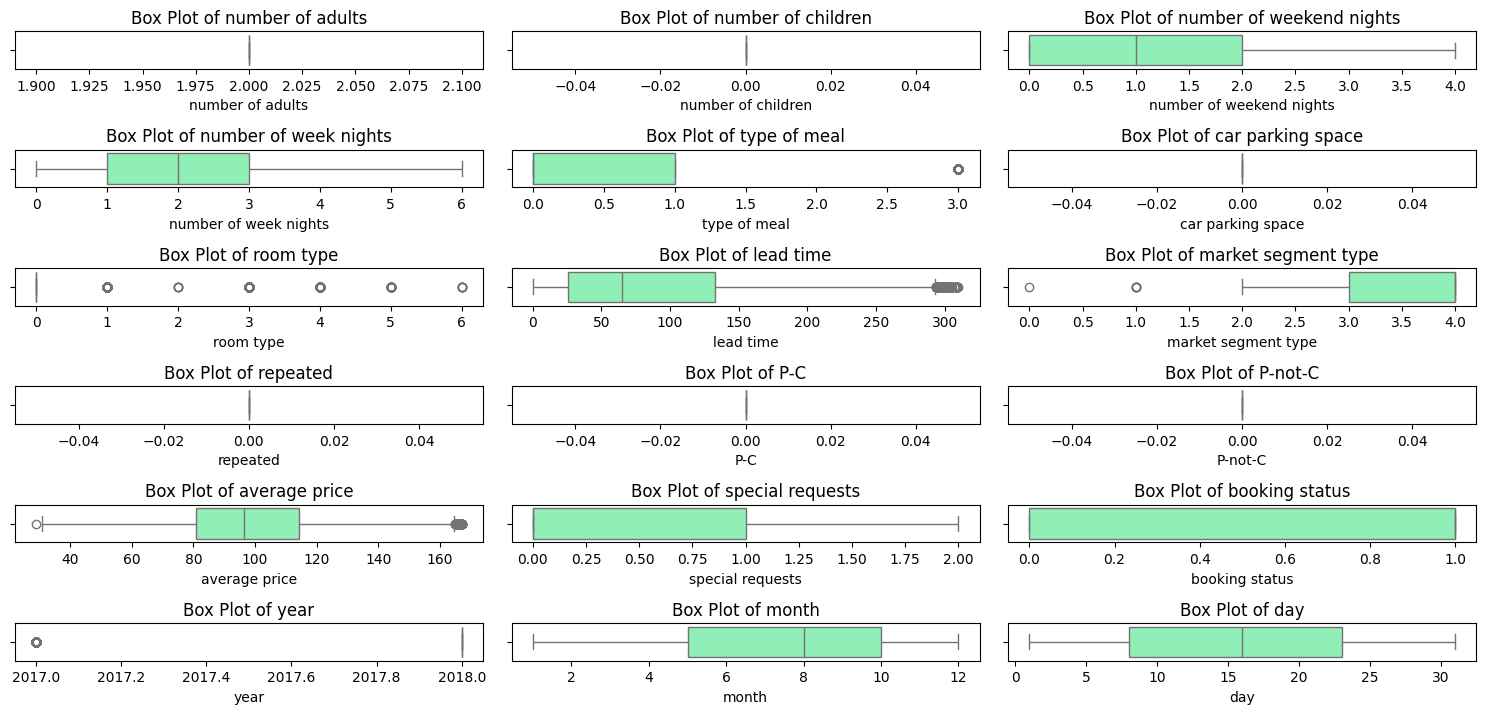

In [19]:
 plot_outliers(data)

## Plotting Histogram for our numerical data

In [20]:
def plot_histograms(data):

    # Select only numerical columns
    numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns
    
    # Set the size of the plot
    plt.figure(figsize=(15, 8))
    
    # Create a histogram for each numerical column
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Adjust the layout
        plt.hist(data[col], bins=30, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

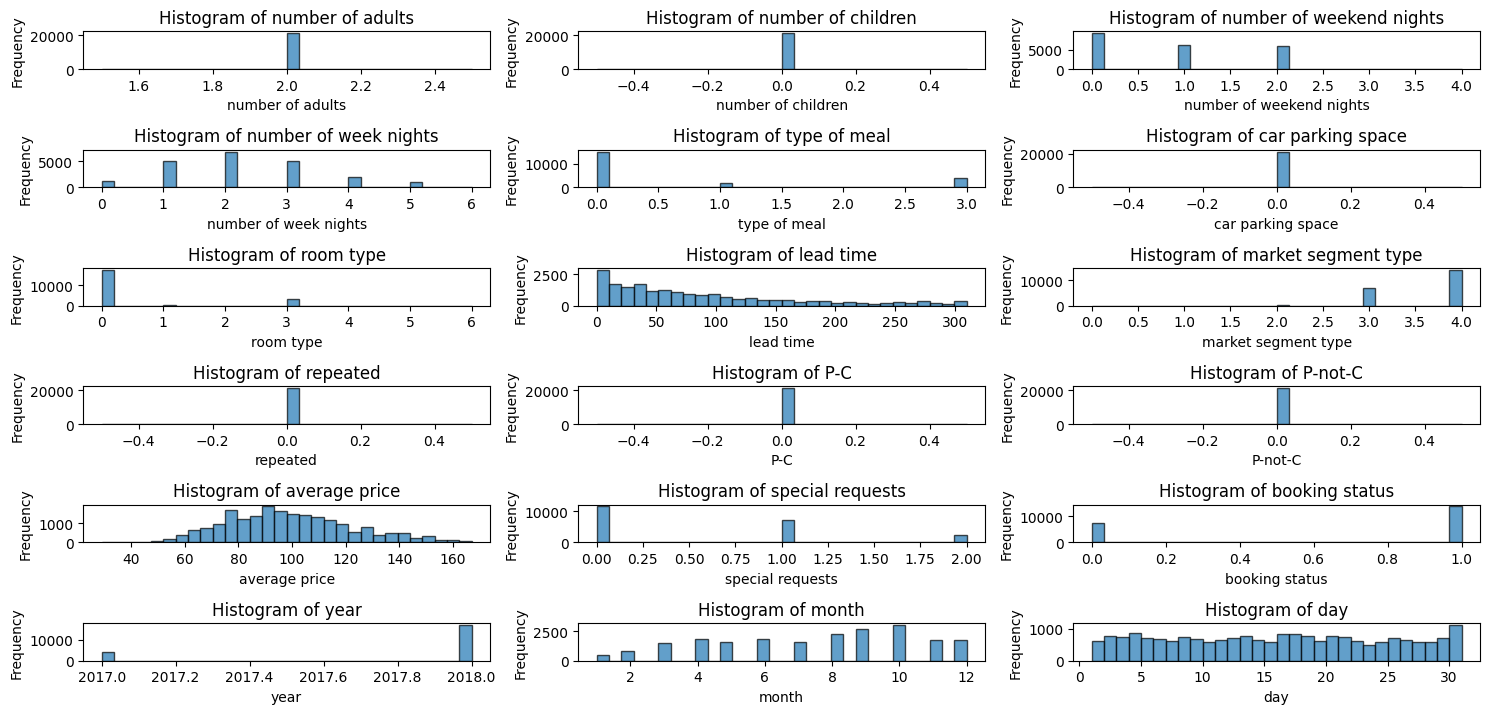

In [21]:
plot_histograms(data)

## split the data to training, validation and testing


In [22]:
data_input = data.drop('booking status', axis=True)
data_output = data['booking status']

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=2)
X_train,X_val, y_train, y_val = train_test_split(data_input, data_output, test_size=0.33, random_state=2)

print('X_train = ', X_train.shape)
print('X_val = ', X_val.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_val = ', y_val.shape)
print('y_test = ', y_test.shape)

X_train =  (14189, 17)
X_val =  (6989, 17)
X_test =  (6989, 17)
y_train =  (14189,)
y_val =  (6989,)
y_test =  (6989,)


## Feature Normalization

In [23]:
scaler = MinMaxScaler()
# detect mean & standard deviation
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test= scaler.transform(X_test)

## Applying KNN Classification

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
 
def KNN(k, train_X,train_y,test_X,test_y):
 knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
 knn.fit(train_X,train_y)
 pred = knn.predict(test_X)
 accuracy = accuracy_score(test_y,pred)
 cr=classification_report(test_y,pred)

 conf_matrix = confusion_matrix(test_y,pred)
 result = {'k': k , 'accuracy' : accuracy ,  'conf_matrix' : conf_matrix ,'report' :cr }

 return result

## best K for highest Accuracy

In [25]:
k_scores = []
for i in range(1,115,2):
    k_result = KNN(i,X_train,y_train,X_val,y_val)
    k_scores.append(k_result)


K : 9
Accuracy : 0.837
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      2452
           1       0.86      0.90      0.88      4537

    accuracy                           0.84      6989
   macro avg       0.83      0.81      0.82      6989
weighted avg       0.84      0.84      0.84      6989

Confusion Matrix : 
[[1777  675]
 [ 463 4074]]


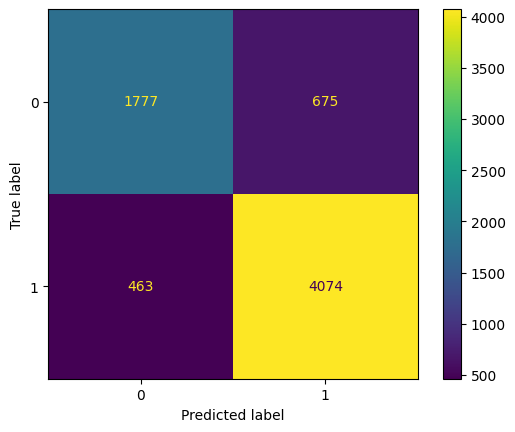

In [26]:
best_k_scores = max(k_scores, key=lambda x: x['accuracy'])
print(f"K : {best_k_scores['k']}")
print(f"Accuracy : {best_k_scores['accuracy']:.3f}")

print("Classification Report : ")
print(best_k_scores['report'])

print("Confusion Matrix : ")
print(best_k_scores['conf_matrix'])
ConfusionMatrixDisplay(best_k_scores['conf_matrix']).plot()
plt.show()

## testing using best k

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=best_k_scores['k'],metric='euclidean')

testing_result = KNN(best_k_scores['k'], X_train,y_train,X_test,y_test)
print("Testing Result: ", testing_result)


Testing Result:  {'k': 9, 'accuracy': 0.8371726999570754, 'conf_matrix': array([[1777,  675],
       [ 463, 4074]], dtype=int64), 'report': '              precision    recall  f1-score   support\n\n           0       0.79      0.72      0.76      2452\n           1       0.86      0.90      0.88      4537\n\n    accuracy                           0.84      6989\n   macro avg       0.83      0.81      0.82      6989\nweighted avg       0.84      0.84      0.84      6989\n'}


## Applying Logistic regresion

In [28]:
from sklearn.linear_model import LogisticRegression

Logistic_reg = LogisticRegression(random_state=1)
Logistic_reg.fit(X_train, y_train)
y_pred = Logistic_reg.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score:  0.8045500071540993
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      2452
           1       0.82      0.89      0.86      4537

    accuracy                           0.80      6989
   macro avg       0.79      0.77      0.78      6989
weighted avg       0.80      0.80      0.80      6989



## Covariance Matrix

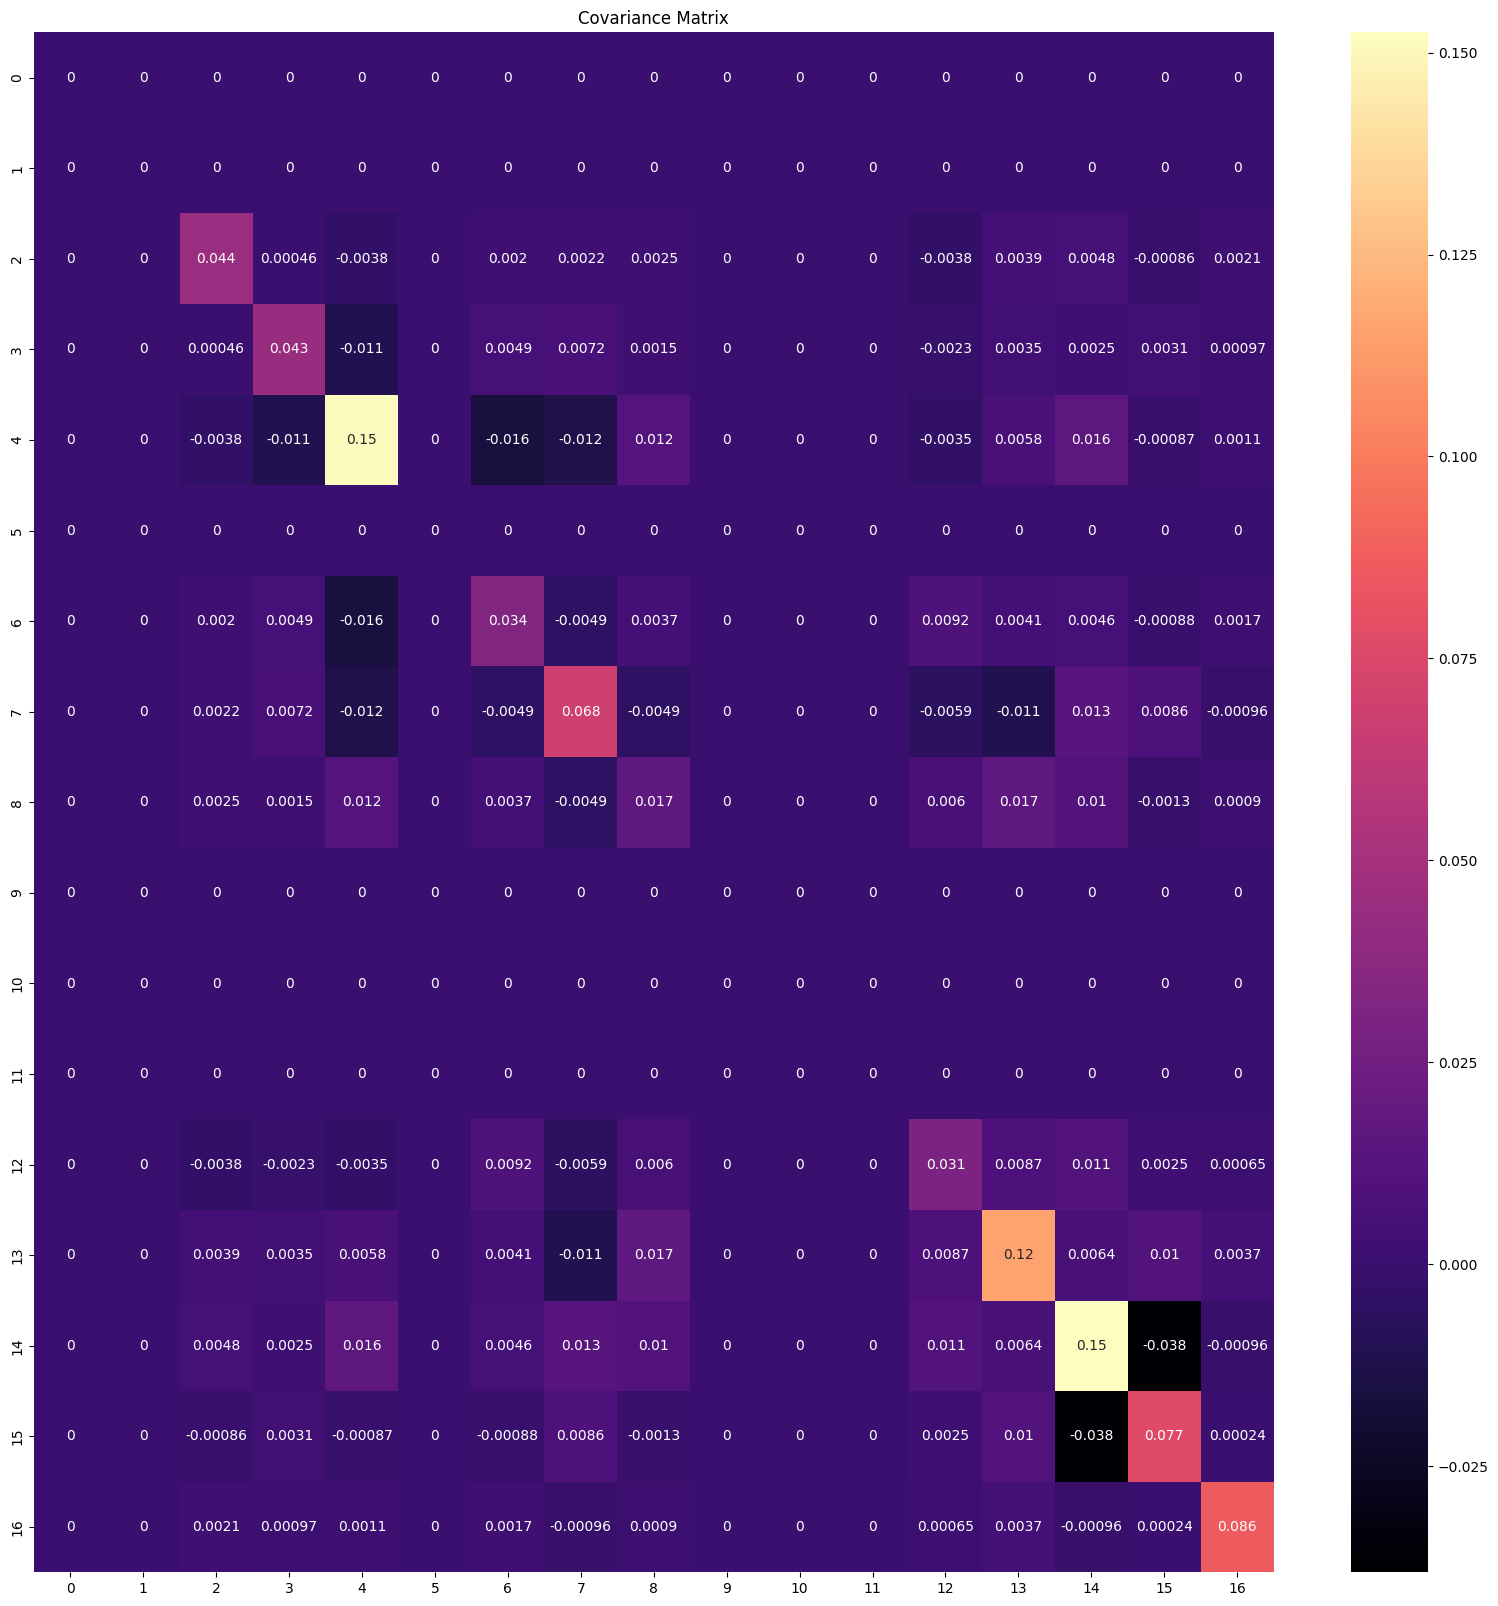

In [29]:
# Calculate covariance matrix
covariance_matrix = np.cov(X_train, rowvar=False)

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(covariance_matrix, annot=True, cmap='magma')
plt.title('Covariance Matrix')
plt.show()